In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from data_readers import (
    japanese_vowels,
    water_quality,
    ionosphere,
    heart_attack,
    banana_quality,
    climate,
    diabetes,
    biodegradable,
    plates
)

from classes import (
    ADAMLogisticRegression,
    IWLSLogisticRegression,
    SGDLogisticRegression,
)

In [5]:
def plot_convergence(ax, logistic_regression_model, title):
    ax.plot(
        range(
            1,
            len(logistic_regression_model.log_likelihoods) + 1
            ),
        logistic_regression_model.log_likelihoods
    )

    ax.set_title(title)
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Log Likelihood")


Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


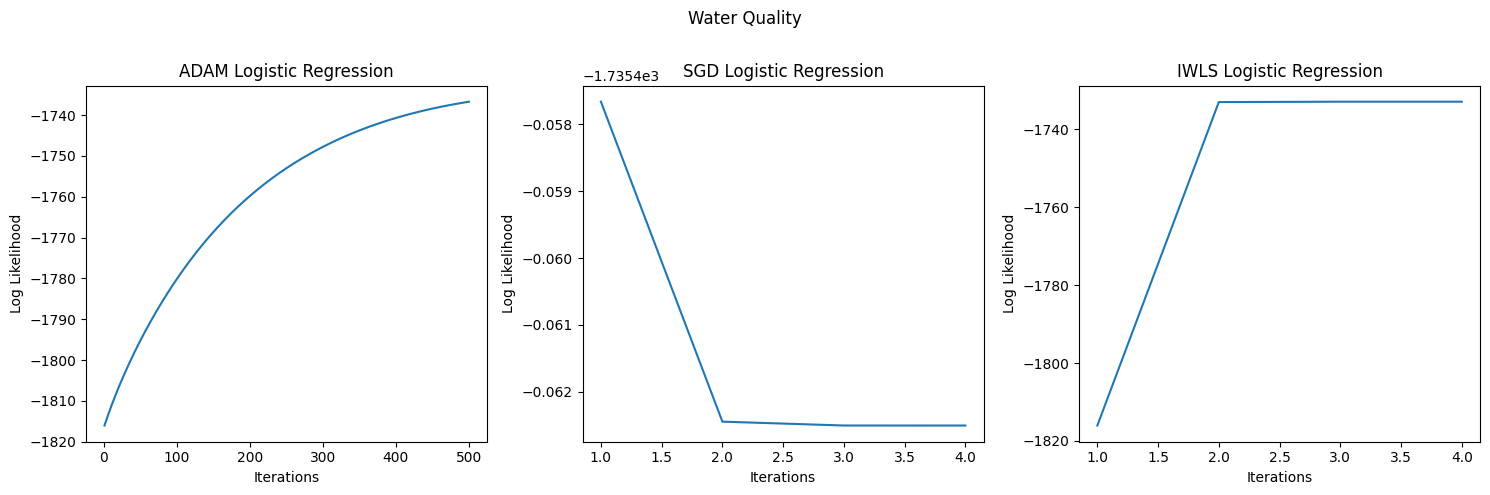

Optimization converged after 11 iterations.


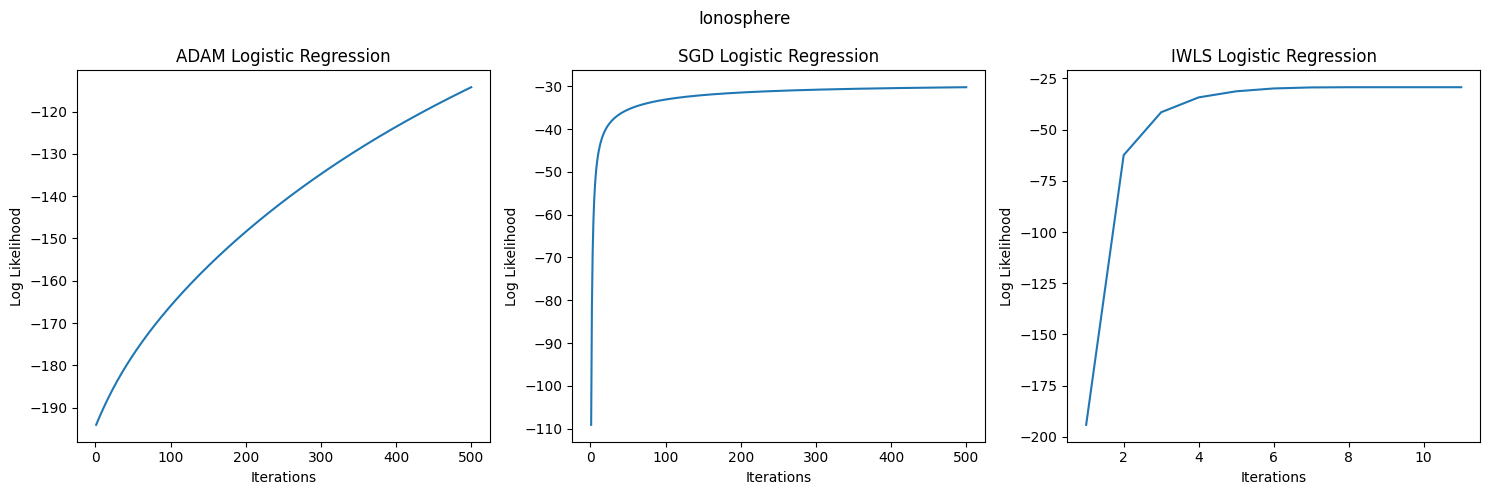

Optimization converged after 72 iterations.
Optimization converged after 7 iterations.


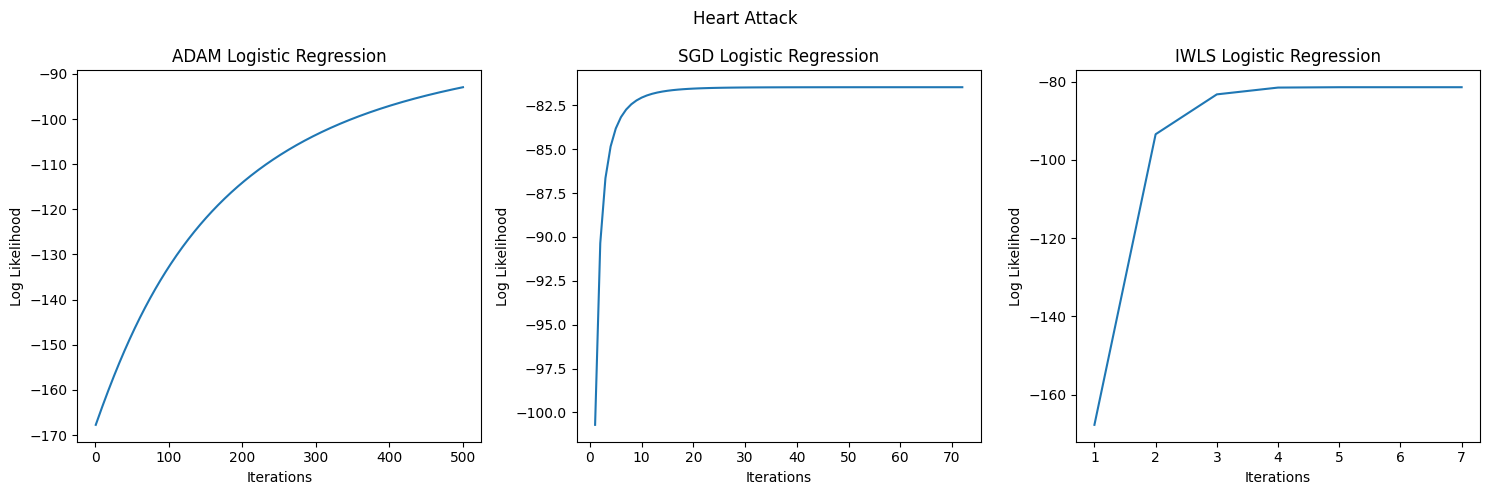

Optimization converged after 143 iterations.
Optimization converged after 10 iterations.


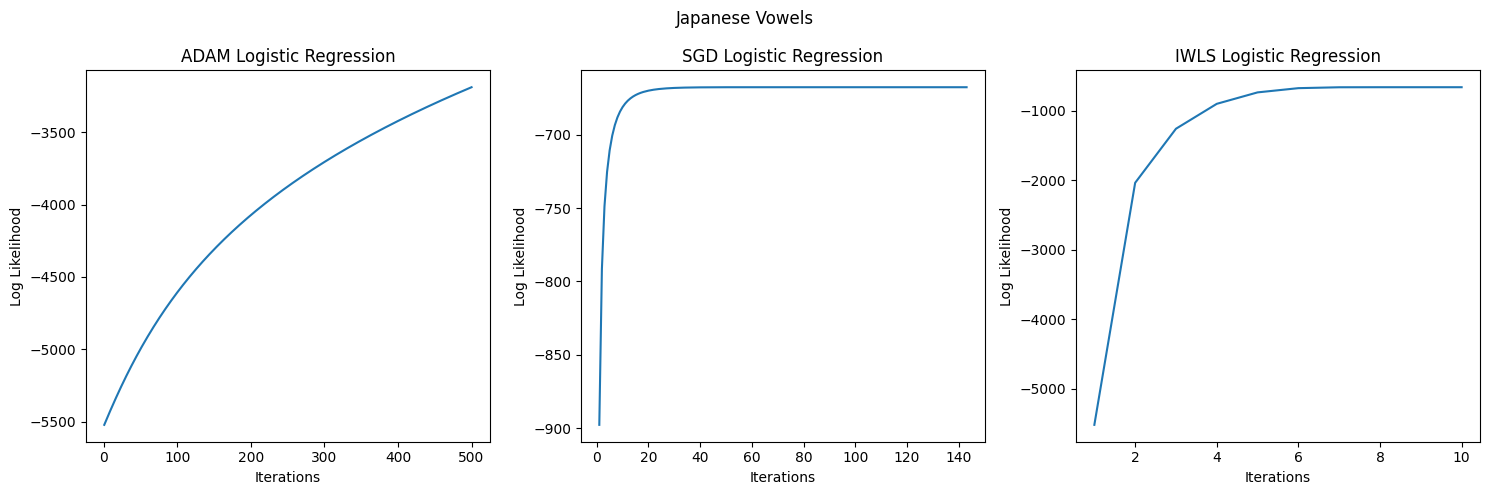

Optimization converged after 11 iterations.
Optimization converged after 8 iterations.


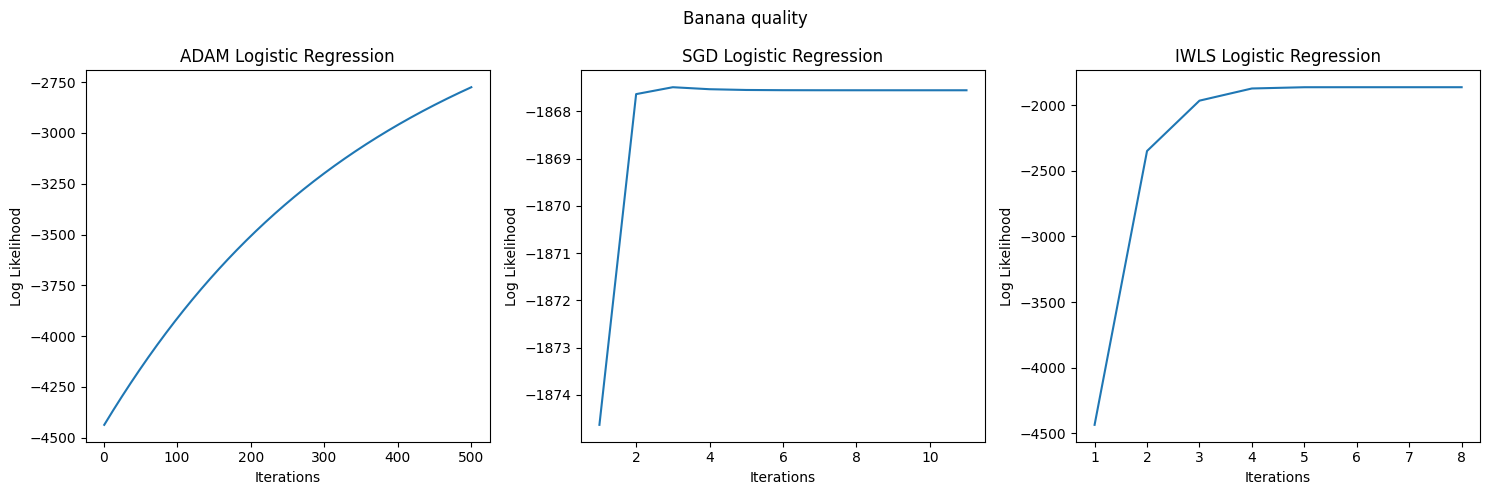

Optimization converged after 151 iterations.
Optimization converged after 8 iterations.


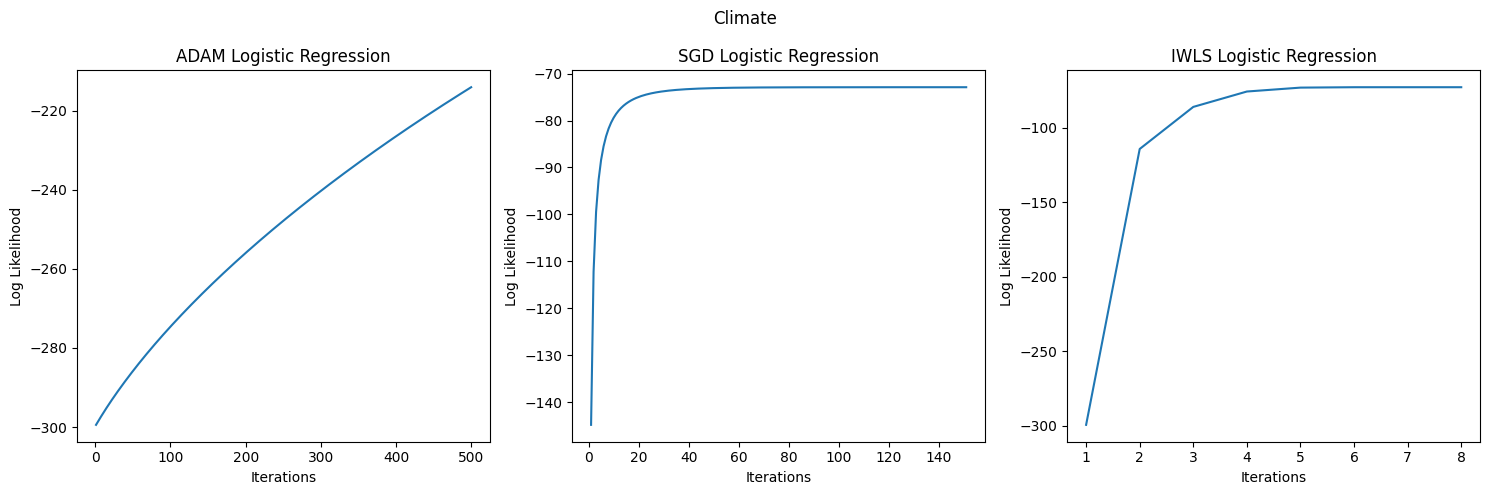

Optimization converged after 25 iterations.
Optimization converged after 6 iterations.


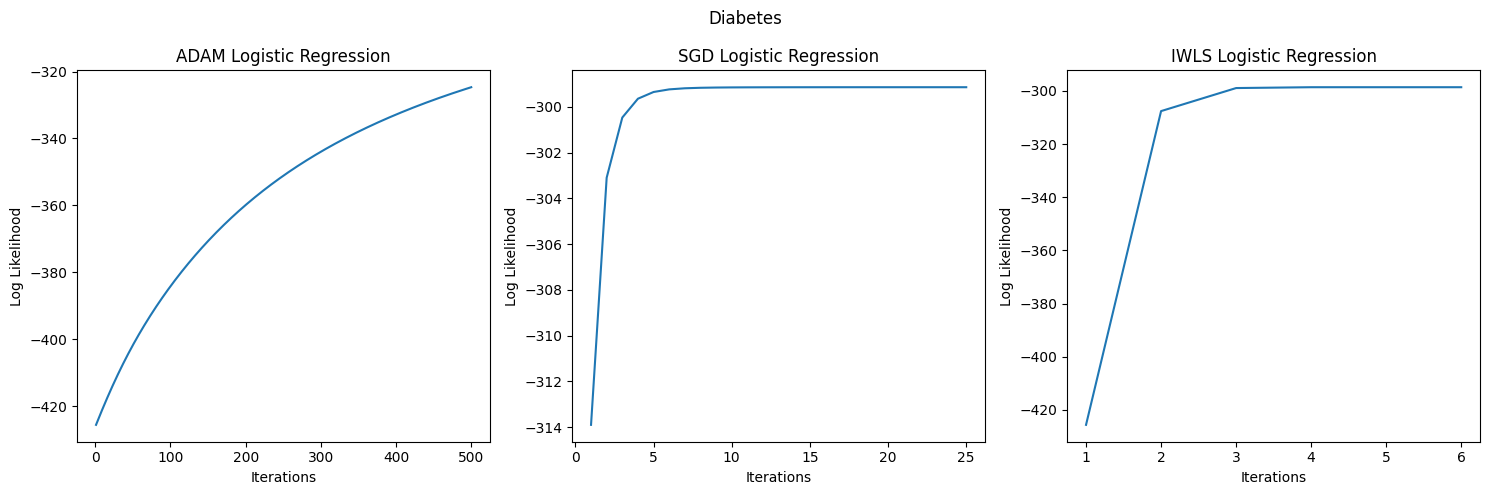

Optimization converged after 17 iterations.


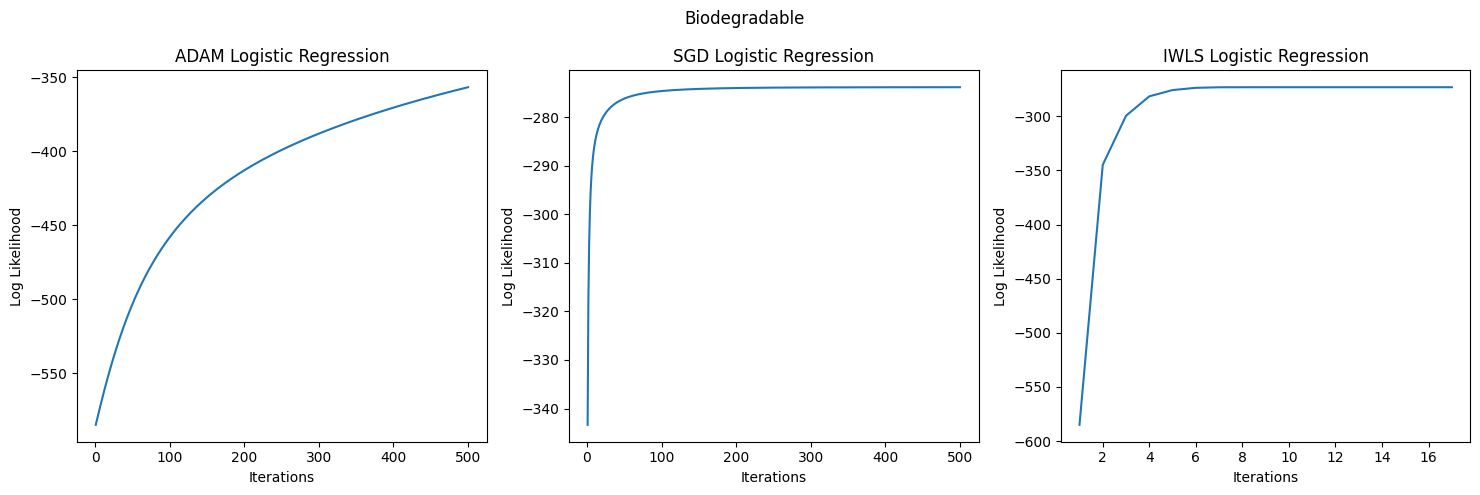

Optimization converged after 13 iterations.


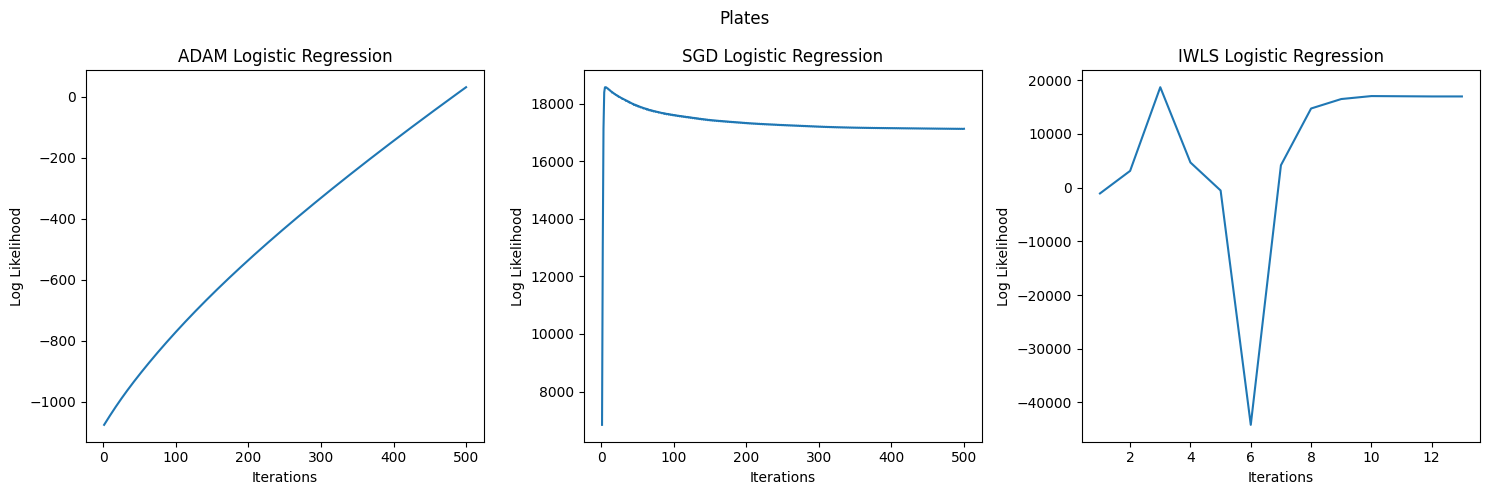

In [6]:
models = {
    "ADAM Logistic Regression": ADAMLogisticRegression(
        learning_rate=0.001,
        iterations=500,
        beta1=0.9,
        beta2=0.999,
        epsilon=1e-8,
        include_interactions=False,
    ),
    "SGD Logistic Regression": SGDLogisticRegression(
        learning_rate=0.01, iterations=500, include_interactions=False
    ),
    "IWLS Logistic Regression": IWLSLogisticRegression(
        iterations=500, include_interactions=False
    ),
}

datasets = {
    "Water Quality": water_quality(),
    "Ionosphere": ionosphere(),
    "Heart Attack": heart_attack(),
    "Japanese Vowels": japanese_vowels(),
    "Banana quality": banana_quality(),
    "Climate": climate(),
    "Diabetes": diabetes(),
    "Biodegradable": biodegradable(),
    "Plates": plates()
}

for dataset_name, data in datasets.items():
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(dataset_name)

    X, y = data

    scaler = StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2
    )

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for ax, (name, model) in zip(axs, models.items()):
        model.fit(X_train_scaled,y_train)
        plot_convergence(ax, model, name)

    plt.tight_layout()
    title_ = dataset_name.lower().replace(" ", "_")
    plt.savefig(f"plots/covergance/{title_}.png")
    plt.show()
